In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Getting acquainted with Bengali graphemes

In [77]:
import gc
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image, ImageDraw, ImageFont

In [3]:
PATH = Path('../input')
HEIGHT = 137
WIDTH = 236

In [4]:
def image_from_char(char):
    font = ImageFont.truetype('hind_siliguri_normal_500.ttf', 120)
    image = Image.new('RGB', (WIDTH, HEIGHT))
    draw = ImageDraw.Draw(image)
    w, h = draw.textsize(char, font=font)
    draw.text(((WIDTH - w) / 2, (HEIGHT - h) / 2), char, font=font)
    return image

## Quick look

In [5]:
%time df = pd.read_feather(PATH / 'train_image_data_0.feather')

CPU times: user 945 ms, sys: 2.52 s, total: 3.46 s
Wall time: 489 ms


In [6]:
image_ids = df['image_id'].values
images = df.drop('image_id', axis=1).values
images = images.reshape(-1, HEIGHT, WIDTH)

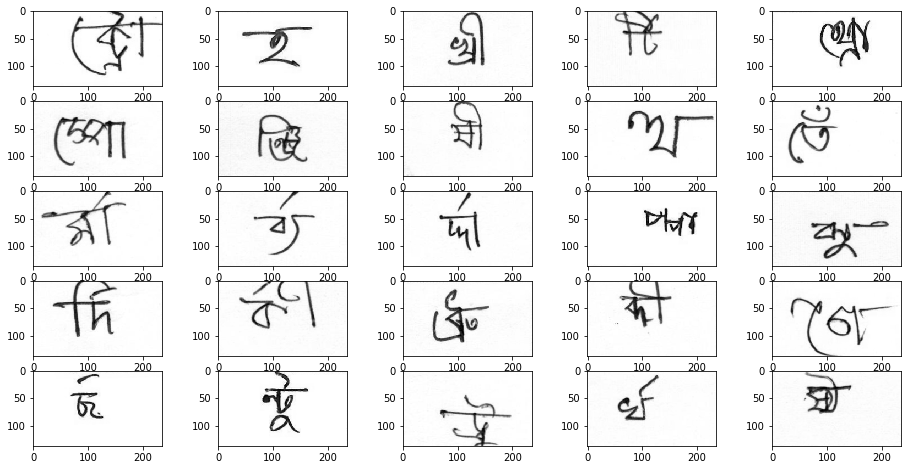

In [7]:
fig, axes = plt.subplots(5, 5, figsize=(16, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')

In [ ]:
del df
gc.collect()

## CSV files

In [8]:
df_train = pd.read_csv(PATH / 'train.csv'); df_train.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [9]:
df_train.shape

(200840, 5)

In [10]:
df_class_map = pd.read_csv(PATH / 'class_map.csv'); df_class_map.head()

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই


In [11]:
df_class_map.shape

(186, 3)

## Grapheme root

In [12]:
print(f"Number of grapheme_root in train: {df_train['grapheme_root'].nunique()}"
      f" / {(df_class_map['component_type'] == 'grapheme_root').sum()}")

Number of grapheme_root in train: 168 / 168


In [13]:
grapheme_root_counts = df_train['grapheme_root'].value_counts()

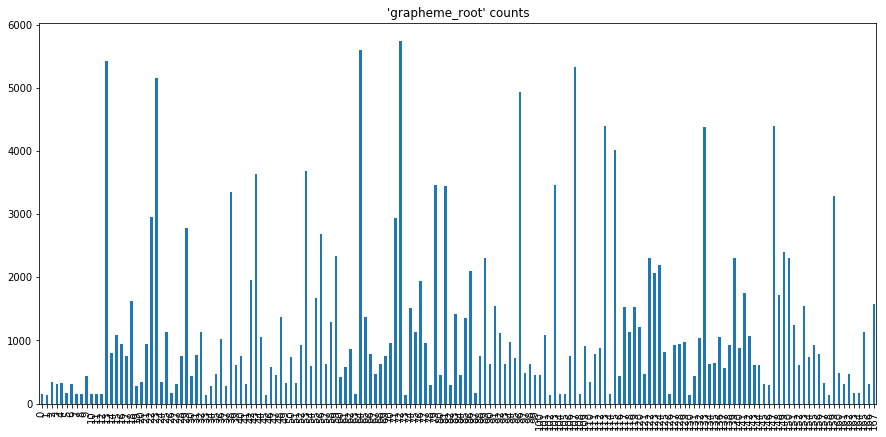

In [36]:
grapheme_root_counts.sort_index().plot.bar(figsize=(15, 7))
plt.title("'grapheme_root' counts");

### Most common

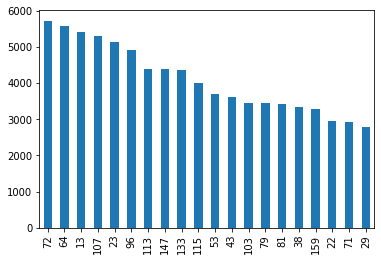

In [15]:
top20_grapheme_roots = grapheme_root_counts[:20]
top20_grapheme_roots.plot.bar();

In [16]:
top20_chars = df_class_map[(df_class_map['component_type'] == 'grapheme_root') &
                            df_class_map['label'].isin(top20_grapheme_roots.index)]['component'].values

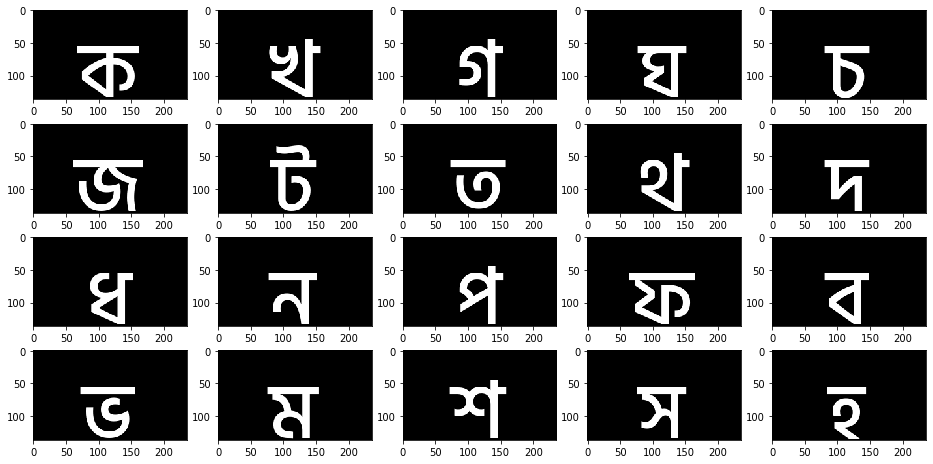

In [17]:
fig, axes = plt.subplots(4, 5, figsize=(16, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(image_from_char(top20_chars[i]), cmap='gray')

### Least common

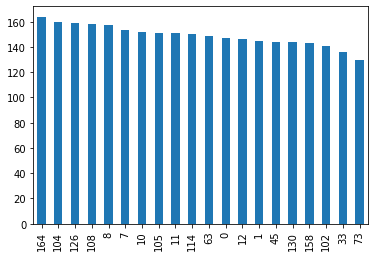

In [18]:
bottom20_grapheme_root_counts = grapheme_root_counts[-20:]
bottom20_grapheme_root_counts.plot.bar();

In [27]:
df_class_map_grapheme = df_class_map[df_class_map['component_type'] == 'grapheme_root']
bottom20_chars = df_class_map_grapheme[
    df_class_map_grapheme['label'].isin(bottom20_grapheme_root_counts.index)]['component'].values

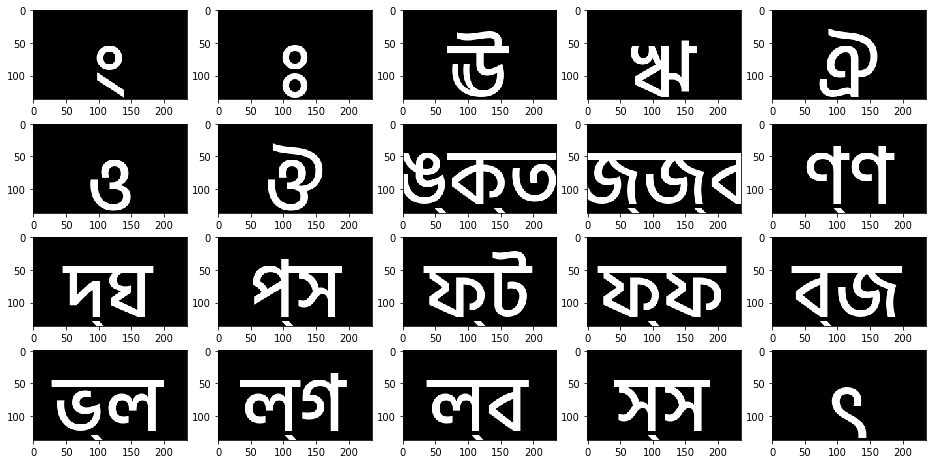

In [28]:
fig, axes = plt.subplots(4, 5, figsize=(16, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(image_from_char(bottom20_chars[i]), cmap='gray')

## Vowel diacritic

In [32]:
template = 'Number of grapheme_root in train: {} / {}'
print(template.format(df_train['vowel_diacritic'].nunique(),
                      (df_class_map['component_type'] == 'vowel_diacritic').sum()))

Number of grapheme_root in train: 11 / 11


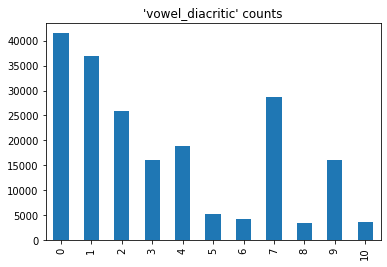

In [38]:
vowel_diacritic_counts = df_train['vowel_diacritic'].value_counts()
vowel_diacritic_counts.sort_index().plot.bar()
plt.title("'vowel_diacritic' counts");

In [47]:
vowels = df_class_map[df_class_map['component_type'] == 'vowel_diacritic']['component'].values
vowels

array(['0', 'া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ে', 'ৈ', 'ো', 'ৌ'],
      dtype=object)

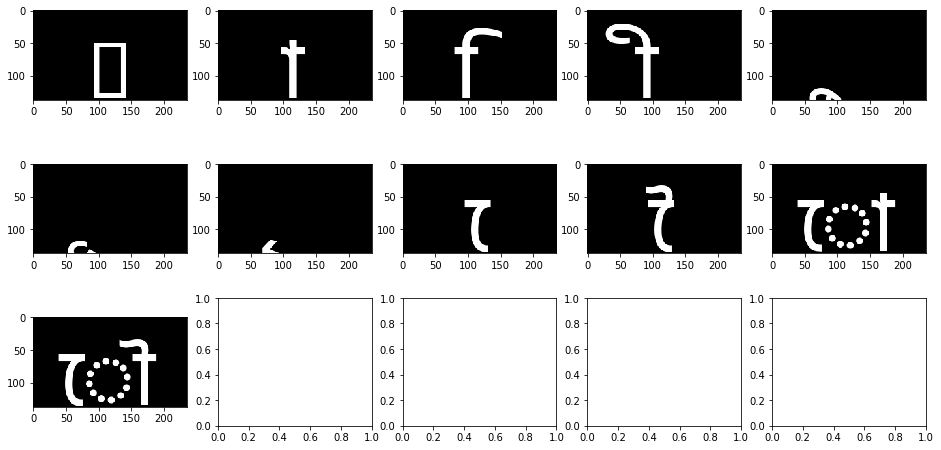

In [50]:
fig, axes = plt.subplots(3, 5, figsize=(16, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i == 11:
        break
    ax.imshow(image_from_char(vowels[i]), cmap='gray')

## Consonant diacritic

In [51]:
template = 'Number of grapheme_root in train: {} / {}'
print(template.format(df_train['consonant_diacritic'].nunique(),
                      (df_class_map['component_type'] == 'consonant_diacritic').sum()))

Number of grapheme_root in train: 7 / 7


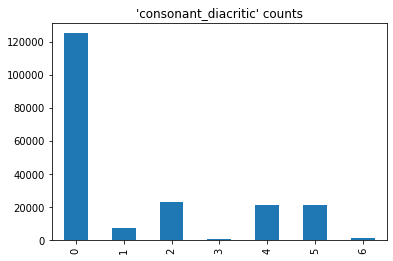

In [52]:
consonant_counts = df_train['consonant_diacritic'].value_counts()
consonant_countsant_countsant_counts.sort_index().plot.bar()
plt.title("'consonant_diacritic' counts");

In [55]:
consonants = df_class_map[df_class_map['component_type'] == 'consonant_diacritic']['component'].values
consonants

array(['0', 'ঁ', 'র্', 'র্য', '্য', '্র', '্র্য'], dtype=object)

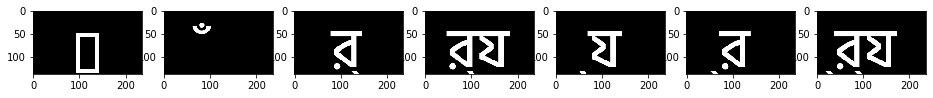

In [57]:
fig, axes = plt.subplots(1, 7, figsize=(16, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(image_from_char(consonants[i]), cmap='gray')

## `grapheme_root`, দ

In [56]:
grapheme_root_counts.head()

72     5736
64     5596
13     5420
107    5321
23     5149
Name: grapheme_root, dtype: int64

In [62]:
char = df_class_map[df_class_map['label'] == 72]['component'].values[0]; char

'দ'

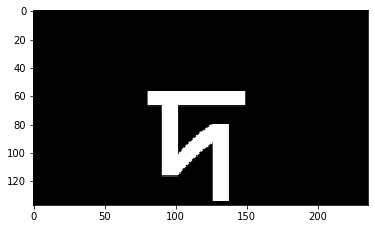

In [64]:
plt.imshow(image_from_char(char), cmap='gray');

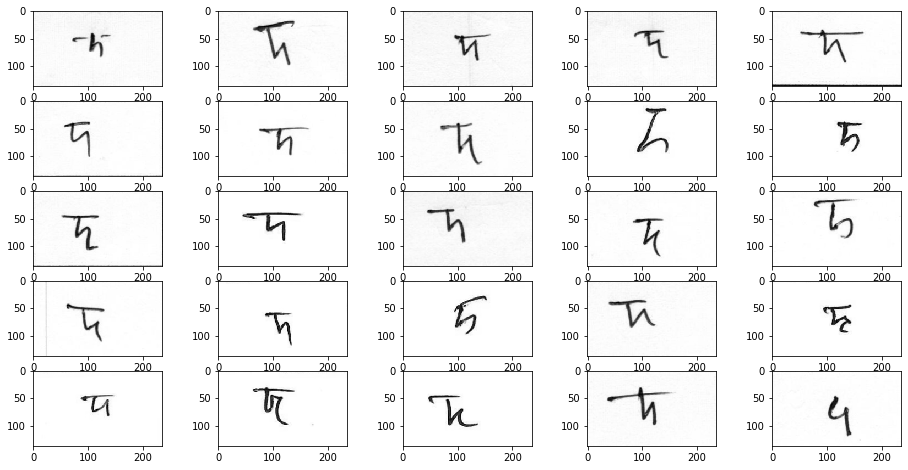

In [85]:
samples = df_train[
    (df_train['grapheme_root'] == 72) &
    (df_train['vowel_diacritic'] == 0) &
    (df_train['consonant_diacritic'] == 0)
].sample(n=25).values

fig, axes = plt.subplots(5, 5, figsize=(16, 8))
axes = axes.flatten()

for ax, sample in zip(axes, samples):
    image = joblib.load(PATH / f"image_pickles/{sample[0]}.pkl")
    image = image.reshape(HEIGHT, WIDTH)
    ax.imshow(image, cmap='gray')

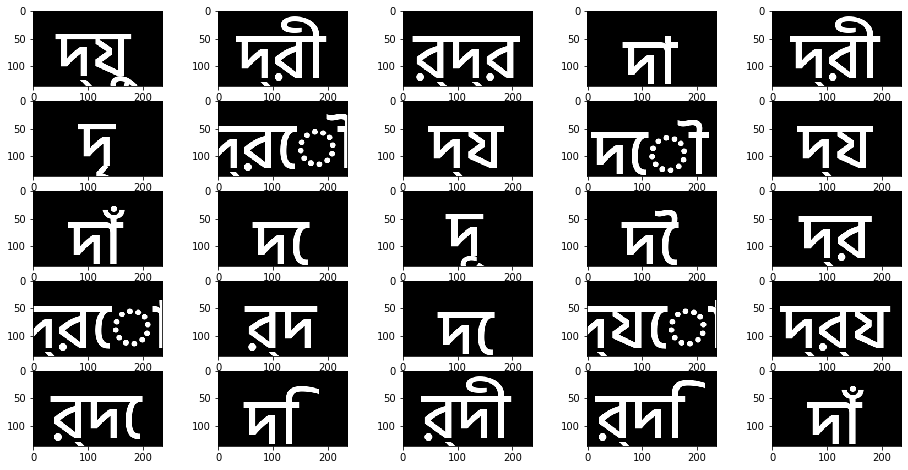

In [83]:
samples = df_train[df_train['grapheme_root'] == 72].sample(n=25).values

fig, axes = plt.subplots(5, 5, figsize=(16, 8))
axes = axes.flatten()

for ax, sample in zip(axes, samples):
    char = sample[-1]
    ax.imshow(image_from_char(char), cmap='gray')

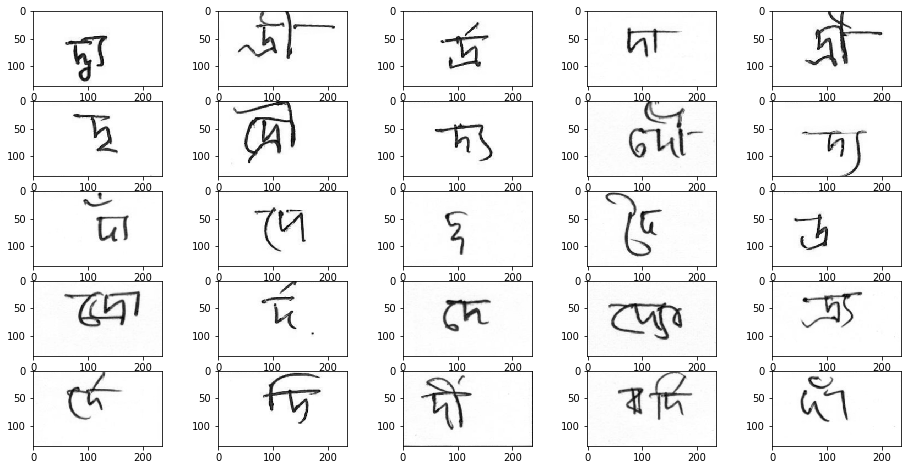

In [84]:
fig, axes = plt.subplots(5, 5, figsize=(16, 8))
axes = axes.flatten()

for ax, sample in zip(axes, samples):
    image = joblib.load(PATH / f"image_pickles/{sample[0]}.pkl")
    image = image.reshape(HEIGHT, WIDTH)
    ax.imshow(image, cmap='gray')